In [1]:
import numpy as pt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
health=pd.read_csv('heart.csv')
health.columns=health.columns.str.strip()

In [5]:
health.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
health.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
health.shape

(303, 14)

In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
health.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
ZScores=stats.zscore(health)
Threshold=3
outliers=(ZScores>Threshold)|(ZScores<-Threshold)
new_data=health[~outliers.any(axis=1)]

<function matplotlib.pyplot.show(close=None, block=None)>

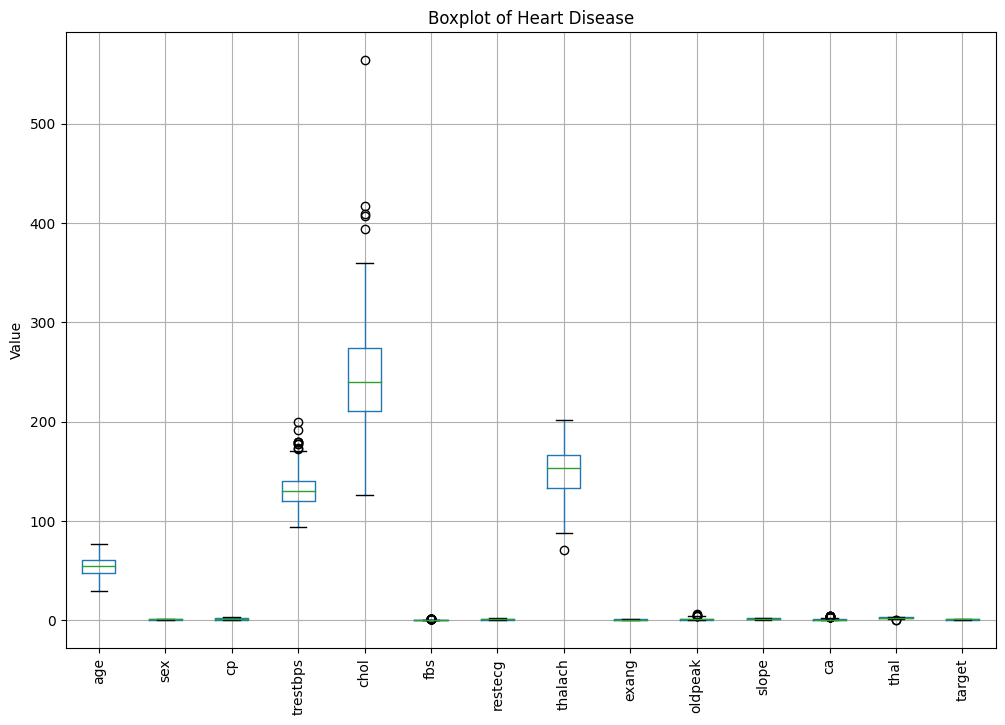

In [11]:
plt.figure(figsize=(12,8))
health.boxplot()
plt.title('Boxplot of Heart Disease')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show

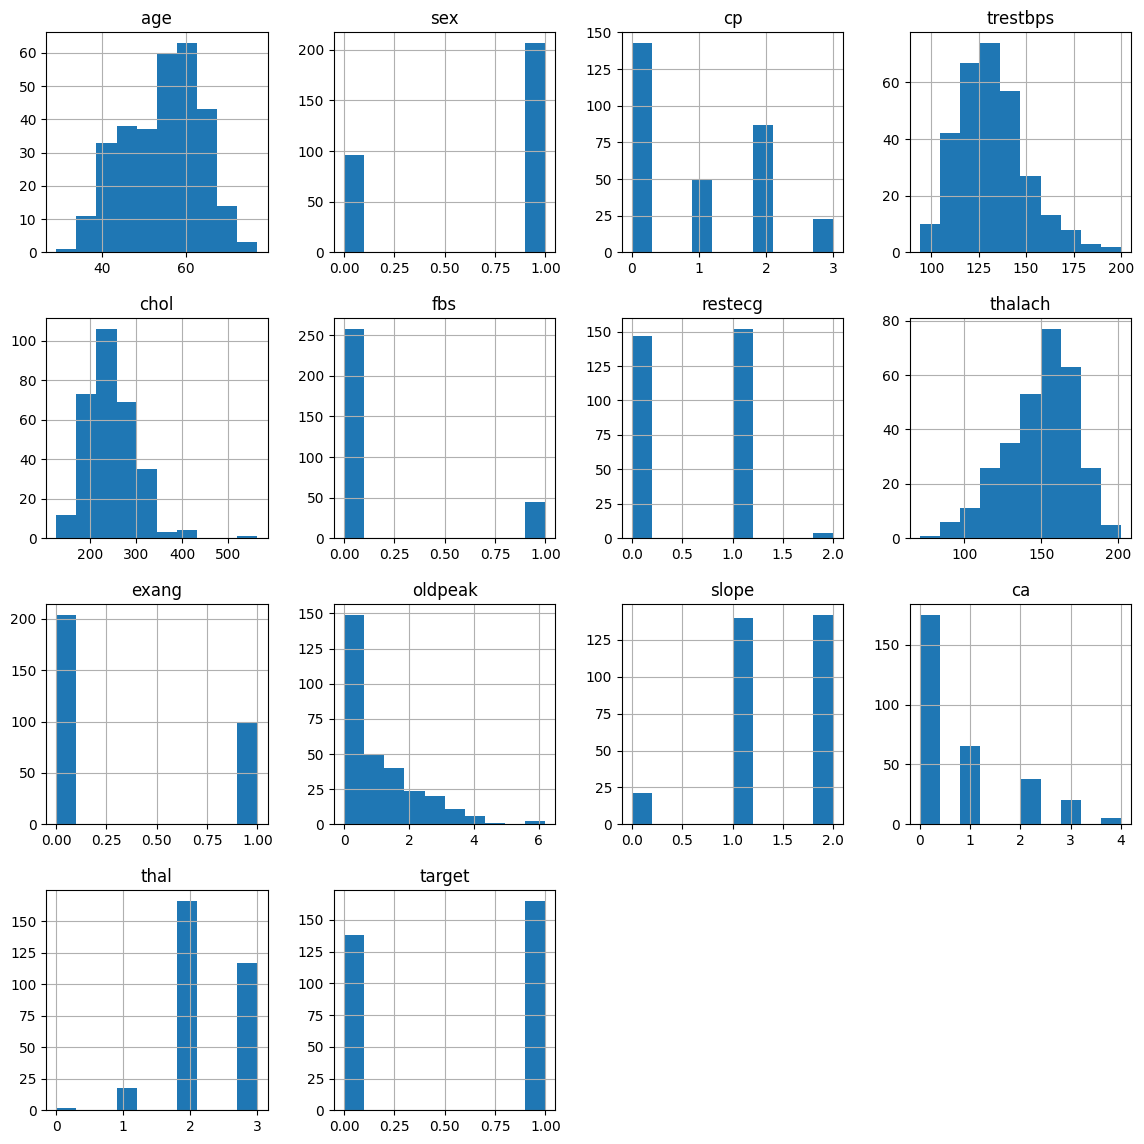

In [12]:
health.hist(figsize=(14,14))
plt.show()

In [13]:
Gender=health['sex'].value_counts()
chestpain=health['cp'].value_counts()
heart_rate=health['exang'].value_counts()

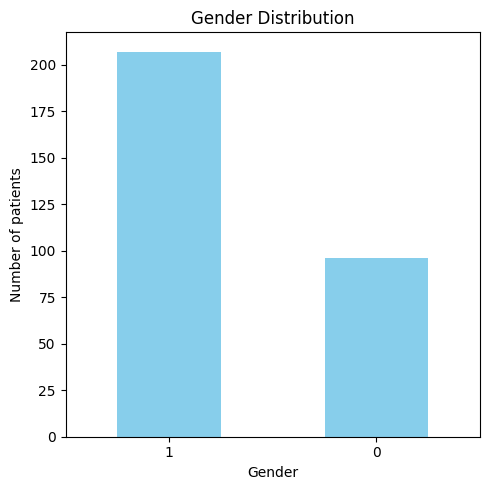

In [14]:
plt.figure(figsize=(5,5))
Gender.plot(kind='bar',color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Gender Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

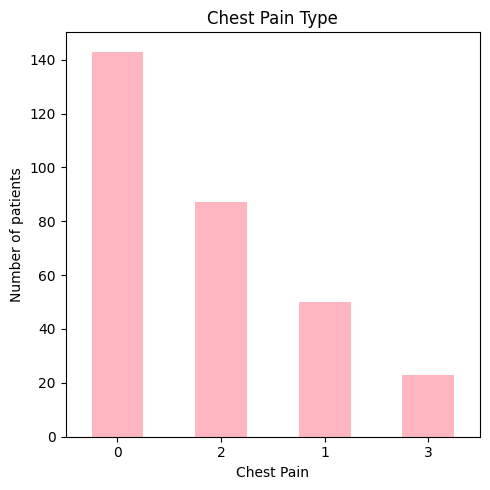

In [15]:
plt.figure(figsize=(5,5))
chestpain.plot(kind='bar',color='lightpink')
plt.xlabel('Chest Pain')
plt.ylabel('Number of patients')
plt.title('Chest Pain Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

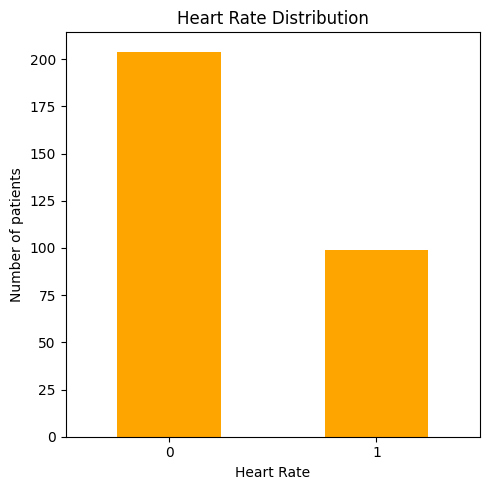

In [16]:
plt.figure(figsize=(5,5))
heart_rate.plot(kind='bar',color='orange')
plt.xlabel('Heart Rate')
plt.ylabel('Number of patients')
plt.title('Heart Rate Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

In [17]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

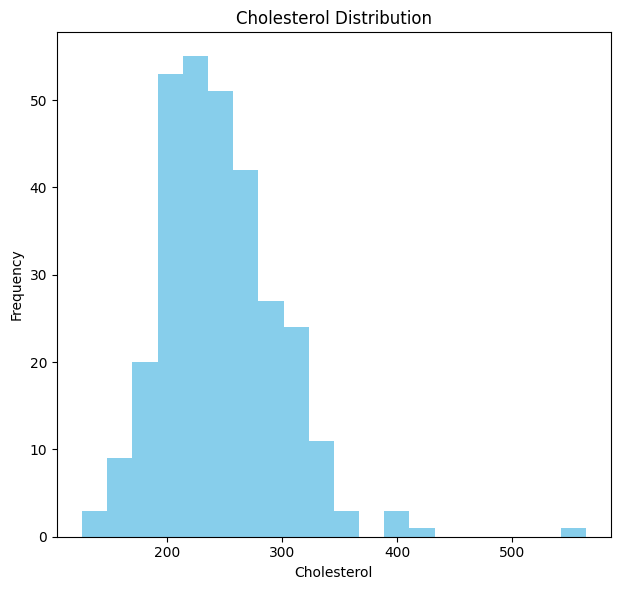

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
plt.hist(health['chol'],bins=20,color="skyblue")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.title("Cholesterol Distribution")
plt.tight_layout()
plt.show()

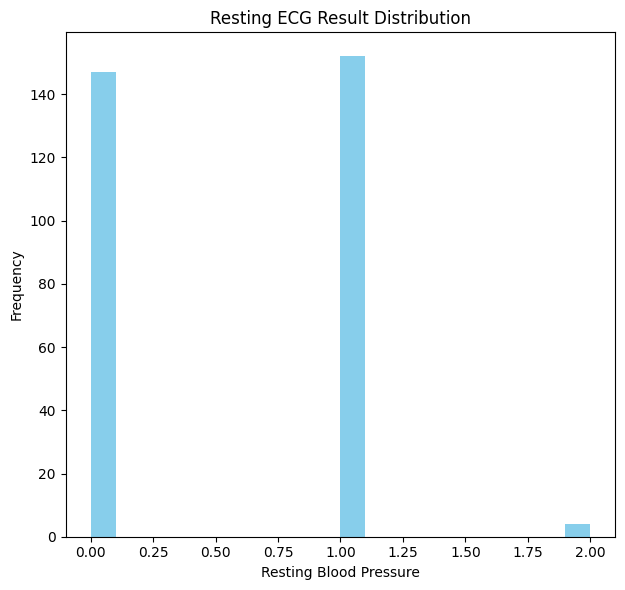

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
plt.hist(health['restecg'],bins=20,color="skyblue")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.title("Resting ECG Result Distribution")
plt.tight_layout()
plt.show()

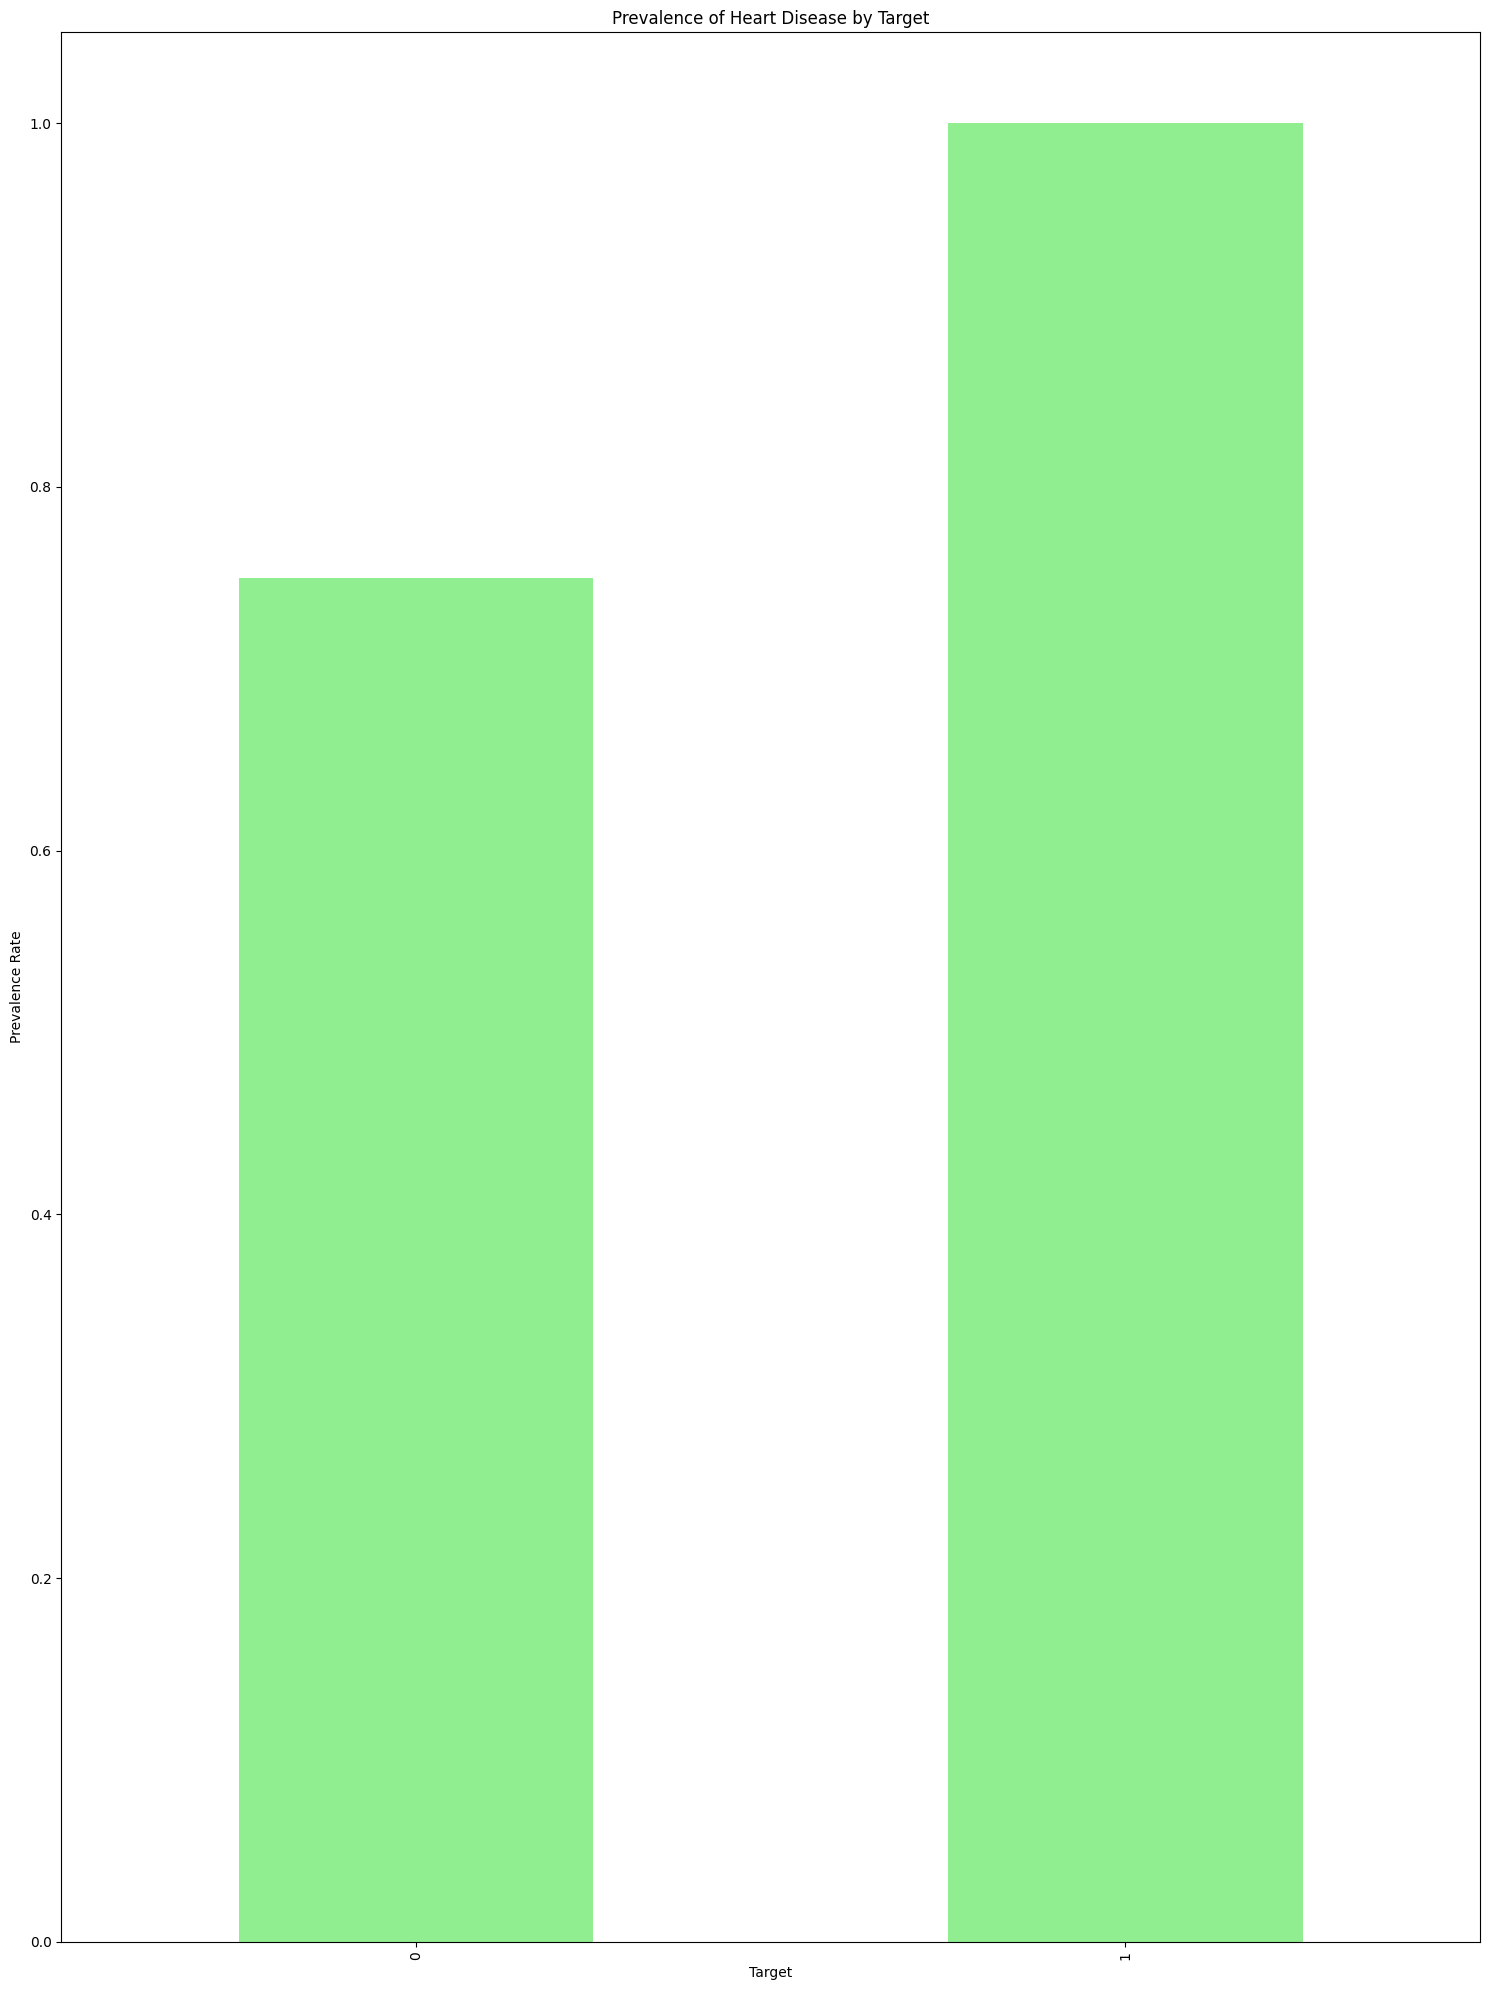

In [20]:
variables=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
plt.figure(figsize=(15,20))
for i, var in enumerate(variables, 1):
  prevalence_rates=health.groupby(var)['target'].mean().sort_index()
  prevalence_rates.plot(kind='bar',color='lightgreen')
  plt.title(f'Prevalence of Heart Disease by {var.capitalize()}')
  plt.xlabel(var.capitalize())
  plt.ylabel('Prevalence Rate')
plt.tight_layout()
plt.show()